# Feature extraction and Data Visualization

ChatGPT's response when asked for traits that could be useful in identifying ai-generated articles.

1)  Average sentence length: AI-generated articles may have longer or shorter sentences than human-written articles on average.

2)  Punctuation usage: AI-generated articles may use certain types of punctuation, such as exclamation points or ellipses, more or less frequently than human-written articles.

3)  Word frequency: AI-generated articles may use certain words more or less frequently than human-written articles. For example, AI-generated articles may use more technical or jargon-y terms, or may use certain phrases or idioms less frequently.

4)  Part of speech tagging: By analyzing the parts of speech used in the article (such as nouns, verbs, and adjectives), we may be able to identify patterns that are more common in AI-generated articles.

5)  Named entity recognition: By analyzing the named entities (such as people, places, and organizations) mentioned in the article, we may be able to identify patterns that are more common in AI-generated articles.

6)  Syntactic complexity: By analyzing the complexity of sentence structures (such as the number of dependent clauses or subordinating conjunctions used), we may be able to identify patterns that are more common in AI-generated articles.

7)  Readability score: By calculating a readability score (such as the Flesch-Kincaid readability score), we may be able to identify patterns that are more common in AI-generated articles.


In [2]:
import pandas as pd
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import string
import scipy.stats as stats
import nltk
from collections import Counter
from readability import Readability #readability

In [3]:
df = pd.read_csv("final_dataset.csv")
df['Content'].replace('', np.nan, inplace=True)
df['Content'] = df.Content.apply(lambda x : x.strip()) #to remove the whitespace from the beginning and at the end of the string
df['Title'] = df.Title.apply(lambda x : x.strip())


#drop NA values
df = df.dropna()

# Select only specific columns from the dataset
selected_columns = ['Title', 'Content', 'Source']
df = df[selected_columns]


## Average Sentence Length

In [4]:
def average_sentence_length(text):
    # Split text into sentences using regular expressions
    sentences = re.findall(r'\b[\w\s\',-]+\b[.?!]', text)
    # Calculate the average sentence length
    total_words = sum(len(sentence.split()) for sentence in sentences)
    num_sentences = len(sentences)
    if num_sentences > 0:
        return total_words / num_sentences
    else:
        return None

In [5]:
df['AvgSentenceLength'] = df.Content.apply(lambda x : average_sentence_length(x))

In [6]:
ai = df[df.Source == 1]
real = df[df.Source == 0]
real = real.dropna()


print(f'Mean sentence length for ai articles: {ai.AvgSentenceLength.mean()}, std: {ai.AvgSentenceLength.std()}')
print(f'Mean sentence length for real articles: {real.AvgSentenceLength.mean()}, std: {real.AvgSentenceLength.std()}')

Mean sentence length for ai articles: 18.641647772281214, std: 3.6804967499338175
Mean sentence length for real articles: 14.174209732215779, std: 4.342594545659541


[Text(0.5, 1.0, 'Average Sentence Length of Real articles')]

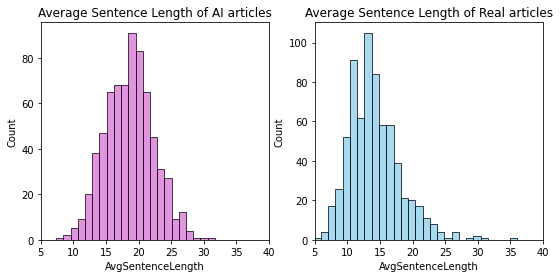

In [7]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(5, 40)
axes[1].set_xlim(5, 40)
sns.histplot(ai, x='AvgSentenceLength', color="orchid", ax=axes[0]).set(title='Average Sentence Length of AI articles')
sns.histplot(real, x='AvgSentenceLength', color="skyblue", ax=axes[1]).set(title='Average Sentence Length of Real articles')

In [8]:
real = real.dropna()
stats.ttest_ind(ai.AvgSentenceLength, real.AvgSentenceLength)

Ttest_indResult(statistic=20.659728614011627, pvalue=7.241821797367738e-83)

In [9]:
df = df.dropna()
stats.pointbiserialr(df.AvgSentenceLength, df.Source)

PointbiserialrResult(correlation=0.485496881984959, pvalue=7.241821797363787e-83)

## Punctuation Usage

In [10]:
def calculate_punctuation_percentage(text):
    # Remove all whitespace characters from the text
    text = "".join(text.split())

    # Calculate the length of the text and the length of the punctuation characters
    text_length = len(text)
    punctuation_length = len([c for c in text if c in string.punctuation])

    # Calculate the percentage of the text that is punctuation
    punctuation_percentage = (punctuation_length / text_length) * 100

    return punctuation_percentage

In [11]:
df['PunctuationPercentage'] = df.Content.apply(lambda x : calculate_punctuation_percentage(x))

In [12]:
ai = df[df.Source == 1]
real = df[df.Source == 0]


print(f'Mean punctuation percentage for ai articles: {ai.PunctuationPercentage.mean()}, std: {ai.PunctuationPercentage.std()}')
print(f'Mean punctuation percentage for real articles: {real.PunctuationPercentage.mean()}, std: {real.PunctuationPercentage.std()}')

Mean punctuation percentage for ai articles: 2.6875824691689734, std: 0.6754914892351818
Mean punctuation percentage for real articles: 3.1053975768187243, std: 0.9493222451526528


[Text(0.5, 1.0, 'Punctuation Percentage of Real articles')]

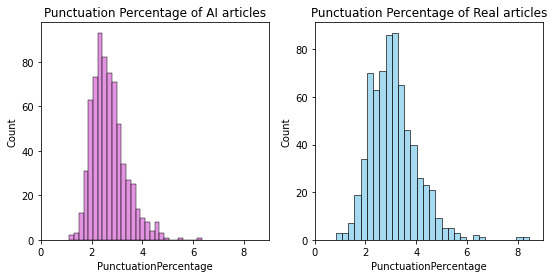

In [13]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 9)
axes[1].set_xlim(0, 9)
sns.histplot(ai, x='PunctuationPercentage', color="orchid", ax=axes[0]).set(title='Punctuation Percentage of AI articles')
sns.histplot(real, x='PunctuationPercentage', color="skyblue", ax=axes[1]).set(title='Punctuation Percentage of Real articles')

In [14]:
real = real.dropna()
stats.ttest_ind(ai.PunctuationPercentage, real.PunctuationPercentage)

Ttest_indResult(statistic=-9.440187087908274, pvalue=1.5193954435542228e-20)

In [15]:
df = df.dropna()
stats.pointbiserialr(df.PunctuationPercentage, df.Source)

PointbiserialrResult(correlation=-0.2459585709964956, pvalue=1.5193954435539224e-20)

### More specific punctuation

In [16]:
def calculate_period_percentage(text):
    # Remove all whitespace characters from the text
    text = "".join(text.split())

    # Calculate the length of the text and the length of the punctuation characters
    period_length = len([c for c in text if c == '.'])
    punctuation_length = len([c for c in text if c in string.punctuation])

    # Calculate the percentage of the text that is punctuation
    period_percentage = (period_length / punctuation_length) * 100

    return period_percentage

def calculate_comma_percentage(text):
    # Remove all whitespace characters from the text
    text = "".join(text.split())

    # Calculate the length of the text and the length of the punctuation characters
    comma_length = len([c for c in text if c == ','])
    punctuation_length = len([c for c in text if c in string.punctuation])

    # Calculate the percentage of the text that is punctuation
    comma_percentage = (comma_length / punctuation_length) * 100

    return comma_percentage

In [17]:
df['PeriodPercentage'] = df.Content.apply(lambda x : calculate_period_percentage(x))
df['CommaPercentage'] = df.Content.apply(lambda x : calculate_comma_percentage(x))
df['OtherPercentage'] = df.Content.apply(lambda x : 100 - calculate_comma_percentage(x) - calculate_period_percentage(x))

In [18]:
ai = df[df.Source == 1]
real = df[df.Source == 0]


print(f'Mean period percentage for ai articles: {ai.PeriodPercentage.mean()}, std: {ai.PeriodPercentage.std()}')
print(f'Mean period percentage for real articles: {real.PeriodPercentage.mean()}, std: {real.PeriodPercentage.std()}\n')
print(f'Mean comma percentage for ai articles: {ai.CommaPercentage.mean()}, std: {ai.CommaPercentage.std()}')
print(f'Mean comma percentage for real articles: {real.CommaPercentage.mean()}, std: {real.CommaPercentage.std()}\n')
print(f'Mean other percentage for ai articles: {ai.OtherPercentage.mean()}, std: {ai.OtherPercentage.std()}')
print(f'Mean other percentage for real articles: {real.OtherPercentage.mean()}, std: {real.OtherPercentage.std()}')

Mean period percentage for ai articles: 36.7898589787901, std: 8.855561592738306
Mean period percentage for real articles: 35.77128293169603, std: 11.737884498868267

Mean comma percentage for ai articles: 38.10069818098364, std: 9.148443854394491
Mean comma percentage for real articles: 33.85370376020647, std: 11.42623587360109

Mean other percentage for ai articles: 25.10944284022626, std: 11.971895339611956
Mean other percentage for real articles: 30.37501330809746, std: 14.537008273302547


[Text(0.5, 1.0, 'Period Percentage of Real articles')]

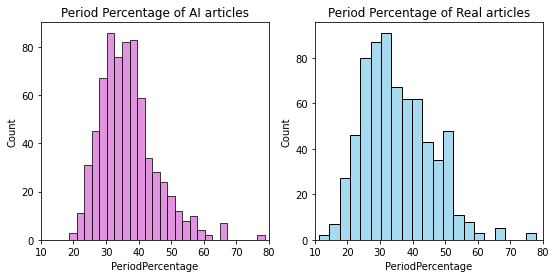

In [19]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(10, 80)
axes[1].set_xlim(10, 80)
sns.histplot(ai, x='PeriodPercentage', color="orchid", ax=axes[0]).set(title='Period Percentage of AI articles')
sns.histplot(real, x='PeriodPercentage', color="skyblue", ax=axes[1]).set(title='Period Percentage of Real articles')

[Text(0.5, 1.0, 'Comma Percentage of Real articles')]

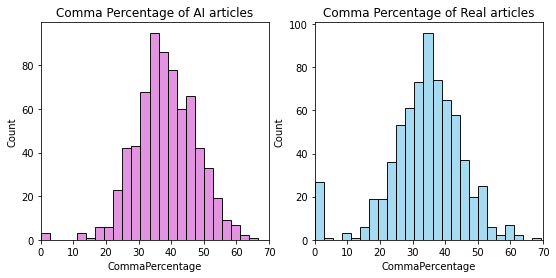

In [20]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 70)
axes[1].set_xlim(0, 70)
sns.histplot(ai, x='CommaPercentage', color="orchid", ax=axes[0]).set(title='Comma Percentage of AI articles')
sns.histplot(real, x='CommaPercentage', color="skyblue", ax=axes[1]).set(title='Comma Percentage of Real articles')

[Text(0.5, 1.0, 'Other Percentage of Real articles')]

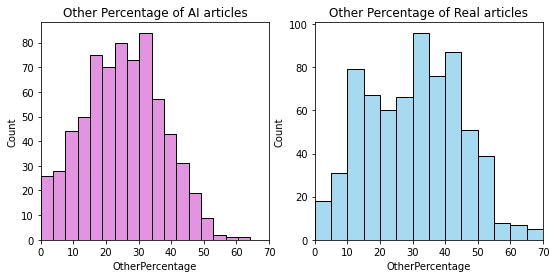

In [21]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 70)
axes[1].set_xlim(0, 70)
sns.histplot(ai, x='OtherPercentage', color="orchid", ax=axes[0]).set(title='Other Percentage of AI articles')
sns.histplot(real, x='OtherPercentage', color="skyblue", ax=axes[1]).set(title='Other Percentage of Real articles')

In [22]:
real = real.dropna()
print(stats.ttest_ind(ai.PeriodPercentage, real.PeriodPercentage))
real = real.dropna()
print(stats.ttest_ind(ai.CommaPercentage, real.CommaPercentage))
real = real.dropna()
print(stats.ttest_ind(ai.OtherPercentage, real.OtherPercentage))

Ttest_indResult(statistic=1.823615742948621, pvalue=0.06842577145864638)
Ttest_indResult(statistic=7.6380933559788495, pvalue=4.092294026269649e-14)
Ttest_indResult(statistic=-7.360571249443462, pvalue=3.1293009465557164e-13)


## Vocabulary Frequency

Uses a type-token ration, basically the number of unique words / total number of words

In [23]:
def vocabulary_richness(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Calculate the number of unique words (types)
    types = set(words)
    num_types = len(types)
    
    # Calculate the total number of words (tokens)
    num_tokens = len(words)
    
    # Calculate the type-token ratio
    if num_tokens > 0:
        ttr = num_types / num_tokens*100
    else:
        ttr = 0
        
    return ttr

In [24]:
df['VocabRichness'] = df.Content.apply(lambda x : vocabulary_richness(x))

In [25]:
ai = df[df.Source == 1]
real = df[df.Source == 0]


print(f'Mean Vocab richness percentage for ai articles: {ai.VocabRichness.mean()}, std: {ai.VocabRichness.std()}')
print(f'Mean Vocab richness percentage for real articles: {real.VocabRichness.mean()}, std: {real.VocabRichness.std()}')

Mean Vocab richness percentage for ai articles: 47.5749851638775, std: 10.999963692942758
Mean Vocab richness percentage for real articles: 51.69852186729588, std: 13.89346183777707


[Text(0.5, 1.0, 'Vocabulary Richness of Real articles')]

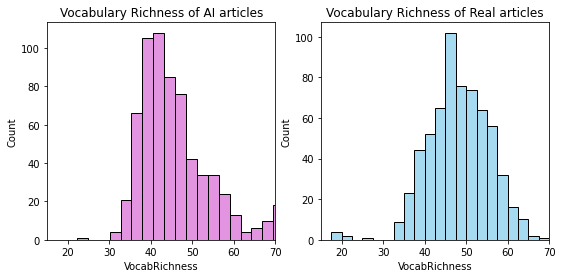

In [26]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(15, 70)
axes[1].set_xlim(15, 70)
sns.histplot(ai, x='VocabRichness', color="orchid", ax=axes[0]).set(title='Vocabulary Richness of AI articles')
sns.histplot(real, x='VocabRichness', color="skyblue", ax=axes[1]).set(title='Vocabulary Richness of Real articles')

In [27]:
real = real.dropna()
stats.ttest_ind(ai.VocabRichness, real.VocabRichness)

Ttest_indResult(statistic=-6.125656681379841, pvalue=1.1748531087141396e-09)

In [28]:
df = df.dropna()
stats.pointbiserialr(df.VocabRichness, df.Source)

PointbiserialrResult(correlation=-0.16247090699137032, pvalue=1.174853108713773e-09)

In [29]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\graduate\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

## Parts of Speech

In [30]:
def count_parts_of_speech(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Tag each word with its part of speech
    tagged_words = nltk.pos_tag(words)

    # Count the number of each part of speech
    counts = Counter(tag for word, tag in tagged_words)
    counts = dict(counts)

    noun = 0
    verb = 0
    adverb = 0
    pronoun = 0
    adjective = 0
    for i in counts:
        if i.startswith('NN'):
            noun += counts[i]
        elif i.startswith('VB'):
            verb += counts[i]
        elif i.startswith('RB'):
            adverb += counts[i]
        elif i.startswith('PRP'):
            pronoun += counts[i]
        elif i.startswith('JJ'):
            adjective += counts[i]

    wc = len(text.split(' '))

    return {'noun':noun/wc*100, 'verb':verb/wc*100, 'adverb':adverb/wc*100, 'pronoun':pronoun/wc*100, 'adjective':adjective/wc*100}

In [31]:
df['pos'] = df.Content.apply(lambda x : count_parts_of_speech(x))

In [32]:
df['Noun'] = df.pos.apply(lambda x : x['noun'])
df['Verb'] = df.pos.apply(lambda x : x['verb'])
df['Adverb'] = df.pos.apply(lambda x : x['adverb'])
df['Pronoun'] = df.pos.apply(lambda x : x['pronoun'])
df['Adjective'] = df.pos.apply(lambda x : x['adjective'])
df = df.drop(labels=['pos'], axis=1)

In [33]:
ai = df[df.Source == 1]
real = df[df.Source == 0]

print(f'Mean Noun percentage for ai articles: {ai.Noun.mean()}, std: {ai.Noun.std()}')
print(f'Mean Noun percentage for real articles: {real.Noun.mean()}, std: {real.Noun.std()}\n')
print(f'Mean Verb percentage for ai articles: {ai.Verb.mean()}, std: {ai.Verb.std()}')
print(f'Mean Verb percentage for real articles: {real.Verb.mean()}, std: {real.Verb.std()}\n')
print(f'Mean Adverb percentage for ai articles: {ai.Adverb.mean()}, std: {ai.Adverb.std()}')
print(f'Mean Adverb percentage for real articles: {real.Adverb.mean()}, std: {real.Adverb.std()}\n')
print(f'Mean Pronoun percentage for ai articles: {ai.Pronoun.mean()}, std: {ai.Pronoun.std()}')
print(f'Mean Pronoun percentage for real articles: {real.Pronoun.mean()}, std: {real.Pronoun.std()}\n')
print(f'Mean Adjective percentage for ai articles: {ai.Adjective.mean()}, std: {ai.Adjective.std()}')
print(f'Mean Adjective percentage for real articles: {real.Adjective.mean()}, std: {real.Adjective.std()}\n')

Mean Noun percentage for ai articles: 32.592090847829866, std: 3.7612016933376844
Mean Noun percentage for real articles: 38.60025033696326, std: 7.0063816103106

Mean Verb percentage for ai articles: 18.011633458286475, std: 2.6861858165403314
Mean Verb percentage for real articles: 17.0742688689238, std: 3.4418723224843317

Mean Adverb percentage for ai articles: 3.601925881874545, std: 1.3712755621686499
Mean Adverb percentage for real articles: 3.496392743882952, std: 1.6013572122198585

Mean Pronoun percentage for ai articles: 4.144736160568336, std: 2.551687542134135
Mean Pronoun percentage for real articles: 4.189046330078122, std: 2.8091556287417467

Mean Adjective percentage for ai articles: 8.805121355286378, std: 2.30708071661047
Mean Adjective percentage for real articles: 7.942005574862857, std: 2.5356523128124984



[Text(0.5, 1.0, 'Noun usage of Real articles')]

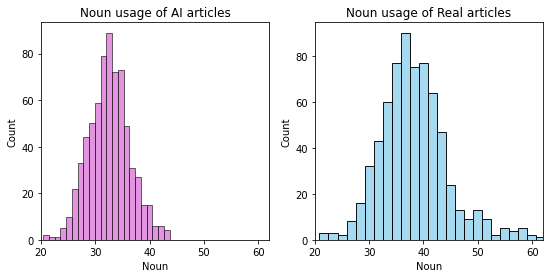

In [34]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(20, 62)
axes[1].set_xlim(20, 62)
sns.histplot(ai, x='Noun', color="orchid", ax=axes[0]).set(title='Noun usage of AI articles')
sns.histplot(real, x='Noun', color="skyblue", ax=axes[1]).set(title='Noun usage of Real articles')

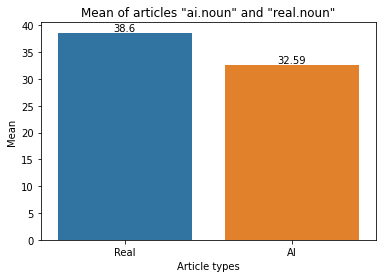

In [37]:
noun_mean_ai=ai['Noun'].mean()
noun_mean_real=real['Noun'].mean()
# Create a barplot
ax=sns.barplot(x=['Real', 'AI'], y=[noun_mean_real, noun_mean_ai])
# Set labels and title
plt.xlabel('Article types')
plt.ylabel('Mean')
plt.title('Mean of articles "ai.noun" and "real.noun"')
# Add labels to the top of the bars
for i, v in enumerate([noun_mean_real,noun_mean_ai]):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# Show the plot
plt.show()

[Text(0.5, 1.0, 'Verb usage of Real articles')]

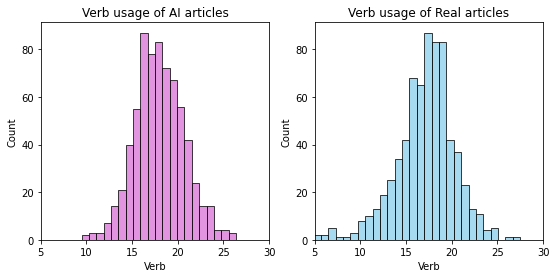

In [38]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(5, 30)
axes[1].set_xlim(5, 30)
sns.histplot(ai, x='Verb', color="orchid", ax=axes[0]).set(title='Verb usage of AI articles')
sns.histplot(real, x='Verb', color="skyblue", ax=axes[1]).set(title='Verb usage of Real articles')

[Text(0.5, 1.0, 'Adverb usage of Real articles')]

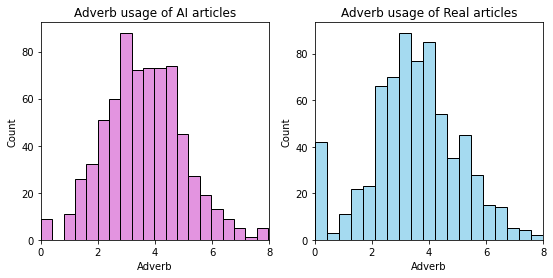

In [39]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 8)
axes[1].set_xlim(0, 8)
sns.histplot(ai, x='Adverb', color="orchid", ax=axes[0]).set(title='Adverb usage of AI articles')
sns.histplot(real, x='Adverb', color="skyblue", ax=axes[1]).set(title='Adverb usage of Real articles')

[Text(0.5, 1.0, 'Pronoun usage of Real articles')]

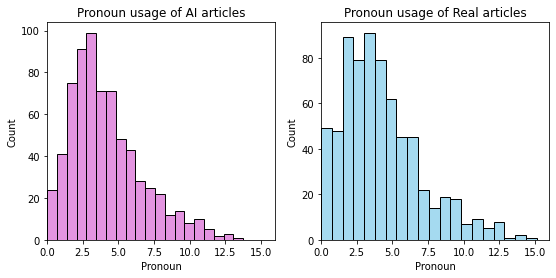

In [40]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 16)
axes[1].set_xlim(0, 16)
sns.histplot(ai, x='Pronoun', color="orchid", ax=axes[0]).set(title='Pronoun usage of AI articles')
sns.histplot(real, x='Pronoun', color="skyblue", ax=axes[1]).set(title='Pronoun usage of Real articles')

[Text(0.5, 1.0, 'Adjective usage of Real articles')]

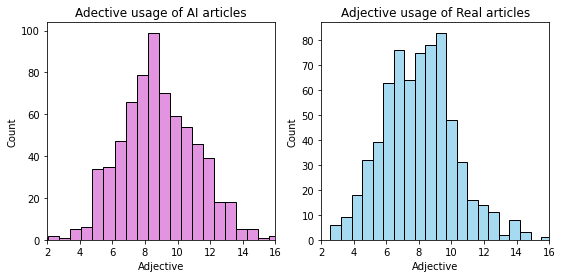

In [41]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(2, 16)
axes[1].set_xlim(2, 16)
sns.histplot(ai, x='Adjective', color="orchid", ax=axes[0]).set(title='Adective usage of AI articles')
sns.histplot(real, x='Adjective', color="skyblue", ax=axes[1]).set(title='Adjective usage of Real articles')

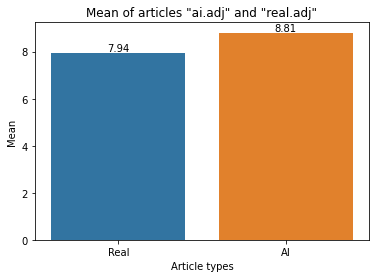

In [42]:
adj_mean_ai=ai['Adjective'].mean()
adj_mean_real=real['Adjective'].mean()
# Create a barplot
ax=sns.barplot(x=['Real', 'AI'], y=[adj_mean_real, adj_mean_ai])
# Set labels and title
plt.xlabel('Article types')
plt.ylabel('Mean')
plt.title('Mean of articles "ai.adj" and "real.adj"')
# Add labels to the top of the bars
for i, v in enumerate([adj_mean_real,adj_mean_ai]):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom')
# Show the plot
plt.show()

In [ ]:
print(f'Noun t-test: {stats.ttest_ind(ai.Noun, real.Noun)}')
print(f'Verb t-test: {stats.ttest_ind(ai.Verb, real.Verb)}')
print(f'Adverb t-test: {stats.ttest_ind(ai.Adverb, real.Adverb)}')
print(f'Pronoun t-test: {stats.ttest_ind(ai.Pronoun, real.Pronoun)}')
print(f'Adjective t-test: {stats.ttest_ind(ai.Adjective, real.Adjective)}')

In [ ]:
print(f'Noun correlation: {stats.pointbiserialr(df.Noun, df.Source)}')
print(f'Verb correlation: {stats.pointbiserialr(df.Verb, df.Source)}')
print(f'Adverb correlation: {stats.pointbiserialr(df.Adverb, df.Source)}')
print(f'Pronoun correlation: {stats.pointbiserialr(df.Pronoun, df.Source)}')
print(f'Adjective correlation: {stats.pointbiserialr(df.Adjective, df.Source)}')

## Named entity recognition

In [ ]:
def count_named_entities(text):
    # Tokenize the input text into sentences
    sentences = nltk.sent_tokenize(text)

    # Tokenize each sentence into words and tag the words with part-of-speech labels
    tokenized_sentences = [nltk.word_tokenize(sent) for sent in sentences]
    tagged_sentences = [nltk.pos_tag(sent) for sent in tokenized_sentences]

    # Use NLTK's named entity recognizer to identify named entities in the tagged sentences
    chunked_sentences = nltk.ne_chunk_sents(tagged_sentences, binary=True)

    # Extract the named entities and their labels from the chunked sentences
    named_entities = []
    for chunked_sent in chunked_sentences:
        for tree in chunked_sent:
            if hasattr(tree, 'label') and tree.label() == 'NE':
                named_entities.append(' '.join([child[0] for child in tree]))

    # Count the number of each named entity type
    counts = Counter(named_entities)

    count = 0
    for item in counts.values():
        count += item

    return count / len(text.split(" ")) * 100


In [ ]:
nltk.download('maxent_ne_chunker')
nltk.download('words')

In [ ]:
df['NamedEntities'] = df.Content.apply(lambda x : count_named_entities(x))

In [ ]:
ai = df[df.Source == 1]
real = df[df.Source == 0]

print(f'Mean Named Entities Frequency for real articles: {real.NamedEntities.mean()}, std: {real.NamedEntities.std()}')
print(f'Mean Named Entities Frequency for ai articles: {ai.NamedEntities.mean()}, std: {ai.NamedEntities.std()}')

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 20)
axes[1].set_xlim(0, 20)
sns.histplot(ai, x='NamedEntities', color="orchid", ax=axes[0]).set(title='Named Entities Frequency of AI articles')
sns.histplot(real, x='NamedEntities', color="skyblue", ax=axes[1]).set(title='Named Entities Frequency of Real articles')

In [ ]:
stats.ttest_ind(ai.NamedEntities, real.NamedEntities)

In [ ]:
stats.pointbiserialr(df.NamedEntities, df.Source)

## Syntactic complexity

## Readability score

In [ ]:
def compute_readability(text):
    if len(text.split(' ')) > 100:
        r = Readability(text)
        return r.flesch_kincaid().score
    else:
        return None

In [ ]:
df['Readability'] = df.Content.apply(lambda x : compute_readability(x))

In [ ]:
ai = df[df.Source == 1]
real = df[df.Source == 0]

print(f'Mean Readability Score for ai articles: {ai.Readability.mean()}, std: {ai.Readability.std()}')
print(f'Mean Readability Score for real articles: {real.Readability.mean()}, std: {real.Readability.std()}')

In [ ]:
f, axes = plt.subplots(1, 2, figsize=(9,4))
axes[0].set_xlim(0, 25)
axes[1].set_xlim(0, 25)
sns.histplot(ai, x='Readability', color="orchid", ax=axes[0]).set(title='Readability Score of AI articles')
sns.histplot(real, x='Readability', color="skyblue", ax=axes[1]).set(title='Readability Score of Real articles')

In [ ]:
real = real.dropna()
ai = ai.dropna()
stats.ttest_ind(ai.Readability, real.Readability)

In [ ]:
df = df.dropna()
stats.pointbiserialr(df.Readability, df.Source)